In [2]:
import numpy as np
from numpy.polynomial.legendre import leggauss
import matplotlib.pyplot as plt
from scipy.special import expn

In [3]:
NANG = 28
NX = 1000

In [4]:
TOTXS = 1.0
WIDTH = 5 / TOTXS
DX = WIDTH / NX
ALPHA = 0.8
LEFT = 0.0
RIGHT = 0.0

In [5]:
mu, wt = leggauss(NANG)

In [6]:
SCALAR = np.zeros(NX)

In [7]:
WTTOT = np.abs(mu) @ wt
INFLUX = 2.0 / WTTOT
print(INFLUX)

1.997974644811797


In [8]:
INNER = 0
EPS = 0.000001
C = 10000

In [9]:
SCALAROLD = np.zeros(NX)

In [10]:
def step(phi0, mu, s=0, nx=NX, totxs=TOTXS, width=WIDTH):
    dx = width / nx
    phi1 = (s + mu * phi0 / dx) / (mu / dx + totxs)
    fluxave = phi1
    return phi1, fluxave

In [11]:
def diamond_difference(phi0, mu, s=0, nx=NX, totxs=TOTXS, width=WIDTH):
    dx = width / NX
    mux = mu / dx
    htotxs = totxs / 2
    
    phi1 = phi0 * (mux - htotxs) / (htotxs + mux)
    
    fluxave = (phi1 + phi0) / 2
    
    return phi1, fluxave

In [12]:
def conv(scalar, scalarOld):
    if np.all(scalar == 0):
        return 1
    else:
        return np.max(np.abs(scalar - scalarOld) / scalar)

In [13]:
INNER = 0
while (C > EPS) and (INNER < 10000):
    INNER += 1
    SCALAROLD = np.copy(SCALAR)
    SCALAR = np.zeros(NX)
    
    LEFT = 0
    RIGHT = 0
    
    for ia in range(NANG):
        phi0 = 0.0
        muabs = abs(mu[ia])
        
        if mu[ia] > 0:
            phi0 = INFLUX
            
        for ix0 in range(NX):
            if mu[ia] < 0:
                ix = NX - 1 - ix0
            else:
                ix = ix0

            phi1, fluxave = step(phi0, mu[ia])
            phi0 = phi1

            SCALAR[ix] += wt[ia] * fluxave

        if mu[ia] > 0:
            RIGHT += wt[ia] * phi0 * mu[ia]
        
    C = conv(SCALAR, SCALAROLD)

In [14]:
INNER

2

In [15]:
RIGHT

0.0017826425553858906

In [16]:
2*expn(3, 5)

0.0017556017855412775

In [17]:
def weighted_diamond_difference(phi0, mu, s=0, nx=NX, totxs=TOTXS, alpha=0.8):
    fluxave = (1 - alpha) * phi0 + alpha * phi1
    raise NotImplementedError

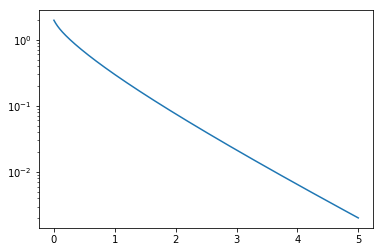

In [18]:
plt.plot(np.linspace(0, WIDTH, NX), SCALAR)
plt.yscale('log')